<a href="https://colab.research.google.com/github/Vinicius-Ikehara/Deep-Learning-com-PyTorch/blob/main/2_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classificação Linear**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

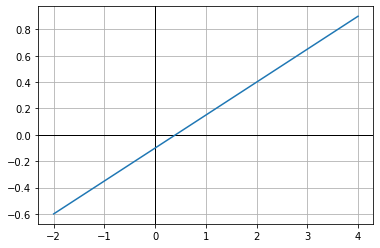

In [ ]:
#Equação da reta ax + by + c

a = -1
b = 4
c = 0.4

x = np.linspace(-2,4,50) # Definindo o X como 50 numeros entre -2 e 4

#ax +by + c
#y = (-a*x - c)/b

y = (-a*x - c)/b

#Linha Vertical
plt.axvline(0,-1,1, color='k', linewidth=1)

#Linha Horizontal
plt.axhline(0,-2,4, color='k', linewidth=1)

plt.plot(x,y)
plt.grid(True)

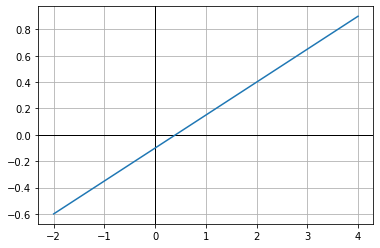

In [ ]:
def plotline(a,b,c):
  x = np.linspace(-2,4,50)
  y = (-a*x - c)/b
  plt.axvline(0,-1,1, color='k', linewidth=1)
  plt.axhline(0,-2,4, color='k', linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

plotline(a,b,c)

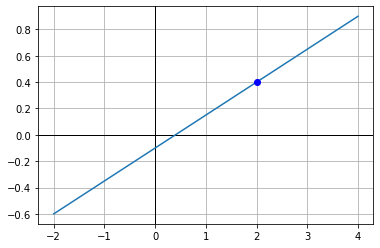

In [ ]:
#Escolhendo três pontos no espaço
#Escolhendo pontos sobre a reta
#Escolhendo X = 2 e Y = 0.4

p1 = (2, 0.4)

ret1 = a*p1[0] + b*p1[1] + c

plotline(a,b,c)
plt.plot(p1[0],p1[1],color='b', marker='o')

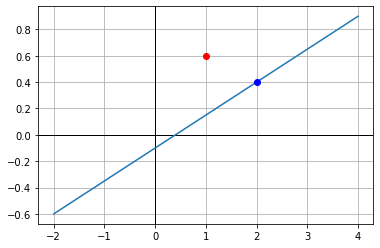

In [ ]:
#Escolhendo três pontos no espaço
#Escolhendo pontos fora a reta
#Escolhendo X = 1 e Y = 0.6

p2 = (1, 0.6)
p1 = (2, 0.4)
ret1 = a*p1[0] + b*p1[1] + c
ret1 = a*p2[0] + b*p2[1] + c

plotline(a,b,c)
plt.plot(p1[0],p1[1],color='b', marker='o')
plt.plot(p2[0],p2[1],color='r', marker='o')

0.00
1.80
-4.20


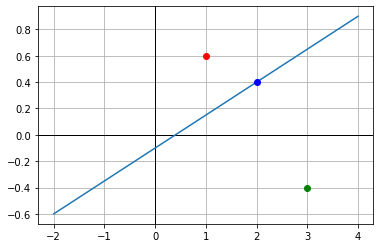

In [ ]:
#Escolhendo três pontos no espaço
#Escolhendo pontos fora a reta e mais longe da reta
#Escolhendo X = 3 e Y = -0.4

p2 = (1, 0.6)
p1 = (2, 0.4)
p3 = (3, -0.4)

# Retorno Positivo então valores acima da reta
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1) 

ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2) 

# Retorno Positivo então valores abaixo da reta

ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)

plotline(a,b,c)
plt.plot(p1[0],p1[1],color='b', marker='o')
plt.plot(p2[0],p2[1],color='r', marker='o')
plt.plot(p3[0],p3[1],color='g', marker='o')

In [ ]:
#Hipeplanos

#Duas Dimensões
#y = w1*x1 + w2*x2 + b

#Três Dimensões
#y = w1*x1 + w2*x2 + w3*x3 + b

**EXERCÍCIO SUGERIDO**

(100, 2) (100,)


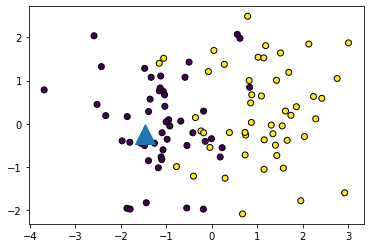

In [ ]:
from sklearn.datasets import make_classification

X,Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

np.random.seed(46)

print(X.shape, Y.shape)

plt.scatter(X[:,0], X[:,1],marker='o',c=Y,edgecolor='k')

p = X[10]

plt.plot(p[0],p[1], marker='^', markersize=20)
#Do lado azul são os dados iguais a 0 
#Do lado amarelo os dados iguais a 1

In [ ]:
def plotmodel(a,b,c):

  plt.scatter(X[:,0], X[:,1],marker='o',c=Y,edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2,4,50)
  y = (-a*x - c)/b
  plt.axvline(0,-1,1, color='k', linewidth=1)
  plt.axhline(0,-2,4, color='k', linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
w1 = 5 #a
w2 = 1  #b
b = -0.4   #c
plotmodel(w1,w2,b)

p = (-1,1)

print(w1 * p[0] + w2 * p[1] + b)

NameError: ignored

1 yellow


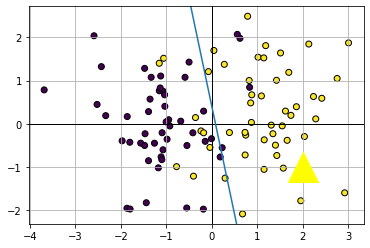

In [ ]:
def classify (ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b
  
  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'
  
p = (2,-1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2,b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)


In [ ]:
acertos = 0

for k in range(len(X)):
  categ, _ =  classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos +=1
  
print("Acurácia: {0}".format(100* acertos/len(X)))

Acurácia: 87.0


**CAMADA LINEAR**

In [ ]:
import torch

from torch import nn #neural networks

In [ ]:
torch.manual_seed(42)

perceptron = nn.Linear(3,1)

print(perceptron)

#Adota por padrão o bias = true

Linear(in_features=3, out_features=1, bias=True)


In [ ]:
for nome, tensor in perceptron.named_parameters():
  print(nome,tensor.data)

print('')
print(perceptron.weight.data)
print(perceptron.bias.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [ ]:
w1, w2 , w3 = perceptron.weight.data.numpy()[0]

b = perceptron.bias.data.numpy()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
  w1, w2 , w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()

  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1,Y2 = np.meshgrid(X1,X2)
  X3 = (b - w1*X1 - w2*X2)/w3

  fig = plt.figure(figsize=(10,8))
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.view_init(azim = 180)
  ax.plot_surface(X1, X2, X3)



<Figure size 720x576 with 0 Axes>

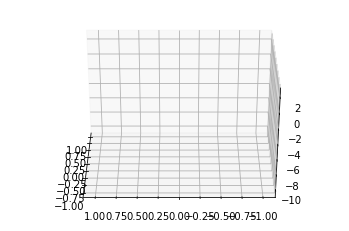

In [ ]:
plot3d(perceptron)